In [63]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import mlxtend
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier


In [62]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('/Users/mohamed_romdhan.GROUPEVSC/Downloads/archive (5)/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe().round()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0
mean,61.0,0.0,582.0,0.0,38.0,0.0,263358.0,1.0,137.0,1.0,0.0,130.0,0.0
std,12.0,0.0,970.0,0.0,12.0,0.0,97804.0,1.0,4.0,0.0,0.0,78.0,0.0
min,40.0,0.0,23.0,0.0,14.0,0.0,25100.0,0.0,113.0,0.0,0.0,4.0,0.0
25%,51.0,0.0,116.0,0.0,30.0,0.0,212500.0,1.0,134.0,0.0,0.0,73.0,0.0
50%,60.0,0.0,250.0,0.0,38.0,0.0,262000.0,1.0,137.0,1.0,0.0,115.0,0.0
75%,70.0,1.0,582.0,1.0,45.0,1.0,303500.0,1.0,140.0,1.0,1.0,203.0,1.0
max,95.0,1.0,7861.0,1.0,80.0,1.0,850000.0,9.0,148.0,1.0,1.0,285.0,1.0


# Setting up the validation framework

In [7]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_val = train_test_split(df_full_train, test_size=0.25)

In [8]:
len(df_full_train), len(df_test),len(df_val)

(239, 60, 60)

In [10]:
y_train = df_train.DEATH_EVENT.values
y_val = df_val.DEATH_EVENT.values
y_test = df_test.DEATH_EVENT.values

In [11]:
del df_train['DEATH_EVENT']
del df_val['DEATH_EVENT']
del df_test['DEATH_EVENT']

# EDA

In [12]:
df_full_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
df_full_train.DEATH_EVENT.value_counts(normalize=True)

0    0.719665
1    0.280335
Name: DEATH_EVENT, dtype: float64

In [14]:
df_full_train.DEATH_EVENT.mean()

0.2803347280334728

In [15]:
global_DEATH_EVENT_rate = df_full_train.DEATH_EVENT.mean()
round(global_DEATH_EVENT_rate,2)

0.28

In [16]:
df_full_train.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [24]:
Death_female = df_full_train[df_full_train.sex==0].DEATH_EVENT.mean()
Death_female

0.3132530120481928

In [25]:
Death_male = df_full_train[df_full_train.sex==1].DEATH_EVENT.mean()
Death_male

0.26282051282051283

In [26]:
global_death = df_full_train.DEATH_EVENT.mean()
global_death

0.2803347280334728

In [23]:
df_full_train.sex.value_counts()

1    156
0     83
Name: sex, dtype: int64

In [27]:
global_death - Death_female

-0.03291828401471997

In [28]:
from IPython.display import display

In [30]:
Features_columns = ['time','ejection_fraction','serum_creatinine','sex','diabetes','anaemia','high_blood_pressure','smoking']

In [31]:
for c in Features_columns:
    print (c)
    df_group = df_full_train.groupby(c).DEATH_EVENT.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_death
    df_group['risk'] = df_group['mean']/global_death
    display(df_group)
    print()
    print()

time


,mean,count,diff,risk
time,,,,
4,1.0,1,0.719665,3.567164
6,1.0,1,0.719665,3.567164
7,1.0,1,0.719665,3.567164
8,1.0,1,0.719665,3.567164
10,1.0,3,0.719665,3.567164
...,...,...,...,...
270,0.0,2,-0.280335,0.000000
271,0.0,1,-0.280335,0.000000
278,0.0,1,-0.280335,0.000000




ejection_fraction


,mean,count,diff,risk
ejection_fraction,,,,
14,1.000000,1,0.719665,3.567164
15,1.000000,1,0.719665,3.567164
17,0.500000,2,0.219665,1.783582
20,0.888889,9,0.608554,3.170813
25,0.500000,30,0.219665,1.783582
30,0.259259,27,-0.021075,0.924820
35,0.139535,43,-0.140800,0.497744
38,0.406250,32,0.125915,1.449160
40,0.071429,28,-0.208906,0.254797




serum_creatinine


,mean,count,diff,risk
serum_creatinine,,,,
0.50,0.000000,1,-0.280335,0.000000
0.60,0.500000,4,0.219665,1.783582
0.70,0.000000,16,-0.280335,0.000000
0.75,0.000000,1,-0.280335,0.000000
0.80,0.047619,21,-0.232716,0.169865
0.90,0.172414,29,-0.107921,0.615028
1.00,0.309524,42,0.029189,1.104122
1.10,0.230769,26,-0.049565,0.823192
1.18,0.000000,9,-0.280335,0.000000




sex


,mean,count,diff,risk
sex,,,,
0,0.313253,83,0.032918,1.117425
1,0.262821,156,-0.017514,0.937524




diabetes


,mean,count,diff,risk
diabetes,,,,
0,0.274648,142,-0.005687,0.979714
1,0.288660,97,0.008325,1.029697




anaemia


,mean,count,diff,risk
anaemia,,,,
0,0.258741,143,-0.021593,0.922973
1,0.312500,96,0.032165,1.114739




high_blood_pressure


,mean,count,diff,risk
high_blood_pressure,,,,
0,0.251613,155,-0.028722,0.897545
1,0.333333,84,0.052999,1.189055




smoking


,mean,count,diff,risk
smoking,,,,
0,0.298137,161,0.017802,1.063502
1,0.243590,78,-0.036745,0.868925


In [32]:
from sklearn.metrics import mutual_info_score

In [33]:
mutual_info_score(df_full_train.DEATH_EVENT,df_full_train.sex)

0.0014146760429092908

In [34]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.DEATH_EVENT)

In [35]:
mi = df_full_train[Features_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

C:\Users\mohamed_romdhan.GROUPEVSC\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


time                   0.489516
serum_creatinine       0.166672
ejection_fraction      0.116373
high_blood_pressure    0.003718
anaemia                0.001710
smoking                0.001646
sex                    0.001415
diabetes               0.000117
dtype: float64

In [36]:
df_full_train[Features_columns].corrwith(df_full_train.DEATH_EVENT).abs()

time                   0.486655
ejection_fraction      0.243002
serum_creatinine       0.238259
sex                    0.053458
diabetes               0.015319
anaemia                0.058675
high_blood_pressure    0.086863
smoking                0.056941
dtype: float64

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

ModuleNotFoundError: No module named 'mlxtend'

In [40]:
Features = ['time','ejection_fraction','serum_creatinine']
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [41]:
accuracy_list = []

In [85]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [86]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


In [124]:

x_Testlog=x_test[:1]
y_predtest = log_reg.predict(x_Testlog)
log_reg_acc = accuracy_score(y_test[:1], y_predtest)
accuracy_list.append(100*log_reg_acc)
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  100.00%


In [110]:
x_Testlog=x_test[:1]
x_Testlog


,time,ejection_fraction,serum_creatinine
179,147,40,0.7


In [121]:
y_predtest = log_reg.predict_proba(x_test)
y_predtest

array([[0.88776795, 0.11223205],
       [0.96704624, 0.03295376],
       [0.85736709, 0.14263291],
       [0.5822132 , 0.4177868 ],
       [0.67943742, 0.32056258],
       [0.22072881, 0.77927119],
       [0.69078981, 0.30921019],
       [0.72585546, 0.27414454],
       [0.97759473, 0.02240527],
       [0.70543141, 0.29456859],
       [0.27112719, 0.72887281],
       [0.96877142, 0.03122858],
       [0.06213896, 0.93786104],
       [0.9315109 , 0.0684891 ],
       [0.56605582, 0.43394418],
       [0.95337645, 0.04662355],
       [0.94038576, 0.05961424],
       [0.67143892, 0.32856108],
       [0.69947733, 0.30052267],
       [0.9301213 , 0.0698787 ],
       [0.05741378, 0.94258622],
       [0.56228656, 0.43771344],
       [0.21976445, 0.78023555],
       [0.74819873, 0.25180127],
       [0.64843867, 0.35156133],
       [0.24020151, 0.75979849],
       [0.95224233, 0.04775767],
       [0.97189115, 0.02810885],
       [0.88488467, 0.11511533],
       [0.76318997, 0.23681003],
       [0.

In [123]:
 churn = y_predtest >= 0.5
churn.sum()

60

<Figure size 432x288 with 0 Axes>

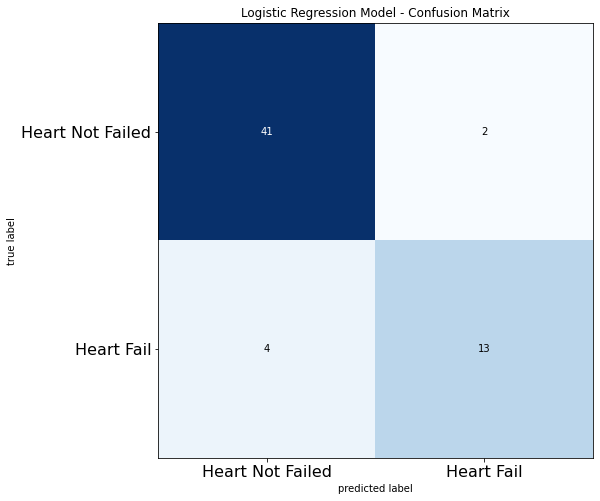

In [56]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [64]:
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [65]:
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  90.00%


<Figure size 432x288 with 0 Axes>

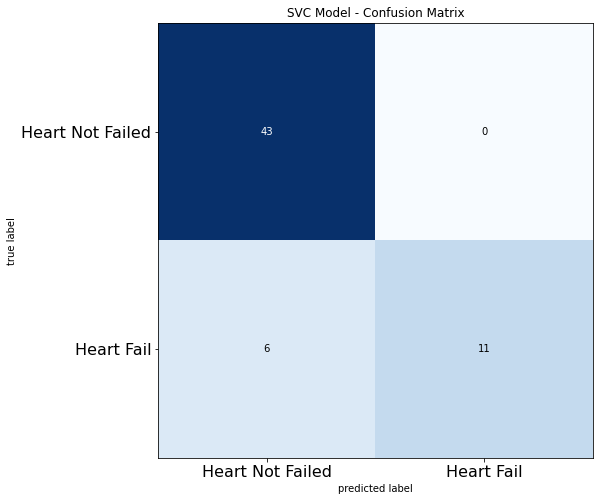

In [66]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [67]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [68]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))


Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 432x288 with 0 Axes>

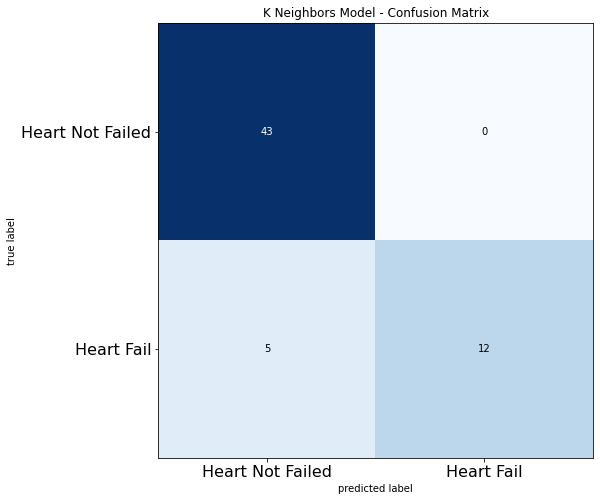

In [69]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [70]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [71]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))


Accuracy of Decision Tree Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

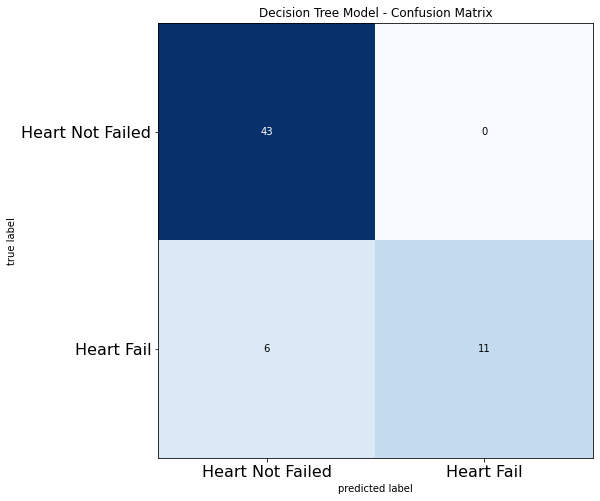

In [72]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [73]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [74]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))


Accuracy of Random Forest Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

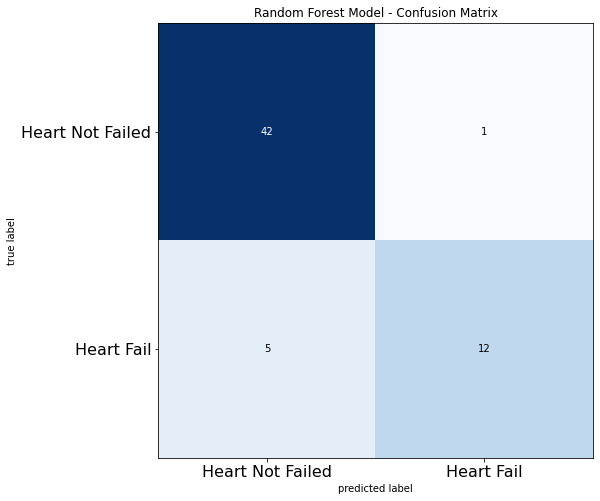

In [75]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [76]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [77]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  93.33%


<Figure size 432x288 with 0 Axes>

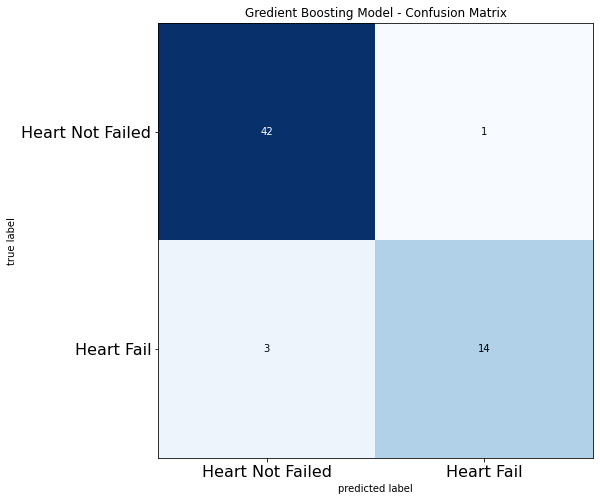

In [78]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [79]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster']

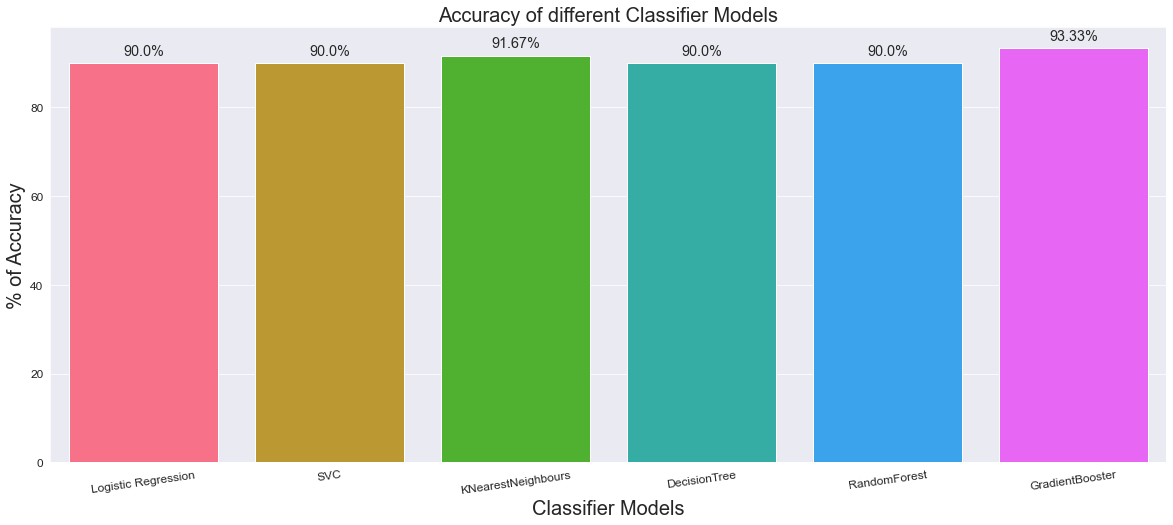

In [80]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [84]:
import pickle
# save the model to disk
filename = 'Heart_disease.sav'
pickle.dump(model, open(filename, 'wb'))